In [2]:
import sys
sys.path.append('..')

In [3]:
%matplotlib inline

import math as m
import numpy as np
import scipy.signal as signal

import matplotlib
import matplotlib.pyplot as plt

from core import Core

from global_var import COLORS


In [4]:
matplotlib.rc('font', family='serif') 
matplotlib.rc('font', serif='Palatino Linotype') 
matplotlib.rc('text', usetex='false') 
matplotlib.rcParams.update({'font.size': 20})

In [5]:
folder = r'C:\SPRUP_data_Jenda\2019_03_13_Jenda_microscopy\20_04_20_Q4/'.replace('\\', '/')
file = 'raw_04_'

folder = r'C:\SPRUP_data_Jenda\2019_03_13_Jenda_microscopy\20_03_16_K5/'.replace('\\', '/')
file = 'raw_02_'

core = []
for i in [1]:
    c = Core(folder, file+str(i))
    c.k = 10
    core.append(c)
    



In [6]:
c = core[0]
c.type = 'raw'
well = 32700
average = 10

In [7]:
print(np.sum(c.frame(i)/c.area*well))
print(np.std(c.frame(i)/c.area*well))
print(np.sum(c.frame(i)))
print(np.std(c.frame(i)))

1912.1921526724946
0.002301907484228039
20003.108791208782
0.02407985294258107


In [8]:
i_electrons = []
i_electrons_std = []

for i in range(20, 200):
# for i in range(20, len(c)):
    i_electrons.append(np.sum(c.frame(i)/c.area*well))
    i_electrons_std.append(np.std(c.frame(i)/c.area*well))
    
i_electrons = np.array(i_electrons)
i_electrons_std = np.array(i_electrons_std)




corr= np.correlate((
    i_electrons - i_electrons.mean())/i_electrons.sum(), 
    (i_electrons_std - i_electrons_std.mean())/i_electrons_std.sum(), 
    mode = 'full')

# correlation = signal.correlate(i_electrons, i_electrons_std, mode = 'full')

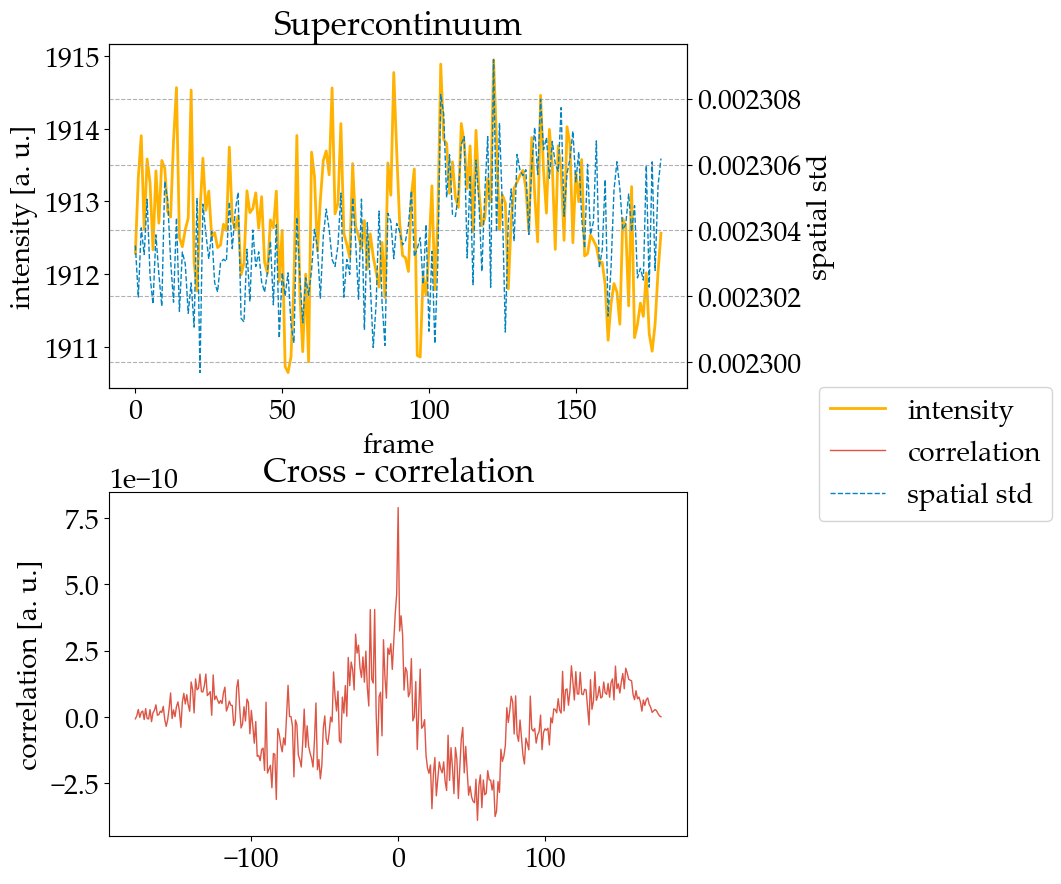

In [9]:
fig, axes_both = plt.subplots(2, 1, figsize=(7, 9), dpi=100)
fig.tight_layout(h_pad=2)

axes = axes_both[0]
axes = axes_both[0]
axes_corr = axes_both[1]

axes.set_title('Supercontinuum')
axes.set_xlabel('frame')
axes.set_ylabel('intensity [a. u.]')

axes_rel = axes.twinx()
axes_rel.grid(linestyle='--')
axes_rel.set_ylabel('spatial std')

axes.plot(i_electrons, linewidth=2, label = 'intensity', color = COLORS[0])



axes_rel.plot(i_electrons_std, linewidth=1, label = 'spatial std', ls = '--', color = COLORS[1])


axes_corr.set_title('Cross - correlation')
axes_corr.set_ylabel('frame shift')
axes_corr.set_ylabel('correlation [a. u.]')

axes_corr.plot(np.arange(-len(i_electrons)+1, len(i_electrons)), corr, linewidth=1, label = 'correlation', color = COLORS[2])

lgd = fig.legend(loc='center left', bbox_to_anchor=(1.1, 0.5))

# fig.savefig('images/fluctuations_supercontinuum.png', dpi=300, bbox_extra_artists=(lgd,), bbox_inches='tight')    


## NP pattern intensity

I_np per px = cca 1.5e-3

In [12]:
# Inp_px = 1.81e-3*well
# Ibg_px = 0.4329e-3*well
# print(Inp_px)
# print(Ibg_px)

Inp_px = 1.28e-3*well
Ibg_px = 0.24e-3*well
print(Inp_px)
print(Ibg_px)

41.856
7.848


In [13]:
SNRdb = 45
SNR = 10**(SNRdb/20)
i_signal = np.average(i_electrons)
print('signal: {:.2f} e-'.format(i_signal))
print('shot noise treshold: {:.2f} e-'.format(SNR**2))

print('SNR: {:.2f}'.format(SNR))
print('noise: {:.2f} e-'.format(i_signal/SNR))
print('I_np: {:.2f} e-'.format(Inp_px))
print('real SNR: {:.2f}'.format(Inp_px/(i_signal/SNR)))




signal: 1912.74 e-
shot noise treshold: 31622.78 e-
SNR: 177.83
noise: 10.76 e-
I_np: 41.86 e-
real SNR: 3.89


In [16]:
19127.4**0.5/10

13.830184380549667